In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as tck
import numpy as np
import pandas as pd

from flux import *

In [2]:
# set up constants

t_diam = 0.13
#t_area = np.pi * (0.5*t_diam)**2 *0.32 # assumes mask passes 32% of pupil
t_area = np.pi * (0.5*t_diam)**2       # phase mask doesn't obstruct pupil
#QE = 0.75                             # chip efficiency
QE = 0.9                               # QE of SIRIUS chip at 650
inst_eff = 0.8                        # instrument efficiency
polz_eff = 1                           # measure both polz
atm_loss = 1                           # no atmosphere loss
S_mag = 2.2

filter_bluedge = 0.510e-6              # microns - center V band, 11% frac BW
filter_rededge = 0.570e-6              # microns
t_integ = 1                            # 1 second

star_mags = np.arange(23)/2
star_fluxes = np.zeros(23)

for m in range(23):
    star_fluxes[m] =flux(filter_bluedge, filter_rededge, t_area, QE, inst_eff, polz_eff, t_integ, atm_loss, star_mags[m])
    

Luminosity before losses: 8.38e+07 photons/integration
Luminosity at detector:   7.54e+07 photons/integration
Final detected flux:      6.03e+07 photons/integration
-------------------
Luminosity before losses: 5.29e+07 photons/integration
Luminosity at detector:   4.76e+07 photons/integration
Final detected flux:      3.81e+07 photons/integration
-------------------
Luminosity before losses: 3.34e+07 photons/integration
Luminosity at detector:   3.00e+07 photons/integration
Final detected flux:      2.40e+07 photons/integration
-------------------
Luminosity before losses: 2.10e+07 photons/integration
Luminosity at detector:   1.89e+07 photons/integration
Final detected flux:      1.52e+07 photons/integration
-------------------
Luminosity before losses: 1.33e+07 photons/integration
Luminosity at detector:   1.19e+07 photons/integration
Final detected flux:      9.56e+06 photons/integration
-------------------
Luminosity before losses: 8.38e+06 photons/integration
Luminosity at detect

In [3]:
diffraction_limit = rad2mas((filter_rededge+filter_bluedge)/2.0/t_diam)  # in milli-arcseconds
diffraction_limit *= 1000 # convert to micro-arcseconds

# Olly's formula for 1-D astrometric precision is: precision = 0.318 * FWHM / sqrt(Nph)
# Let us suppose that we want to get to 1 micro-arcsecond - how many photons do we need?

n_photons_1uas = (0.318 * diffraction_limit)**2

# so how long will it take stars of various magnitudes to accumulate this many counts?

integ_seconds_for_1uas = n_photons_1uas/star_fluxes


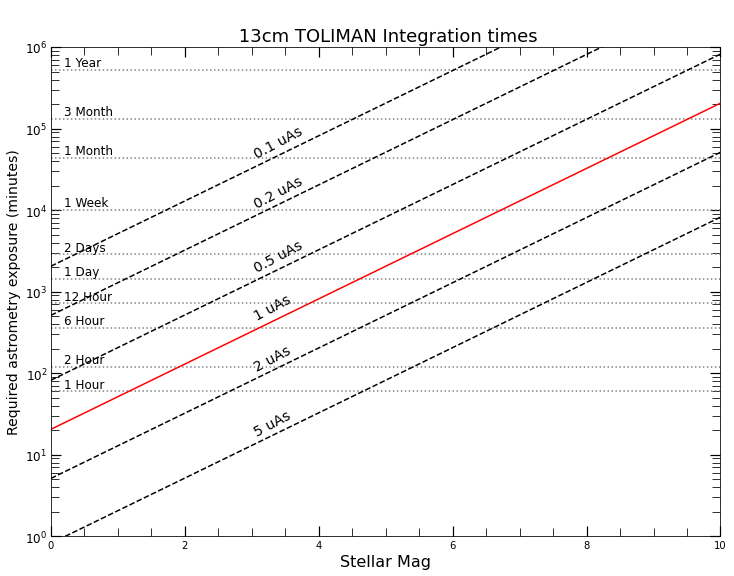

In [9]:
# plotting stuff
astrometric_def = np.array([0.1,0.2,0.5,2,5])
astrometric_words = ['0.1 uAs', '0.2 uAs', '0.5 uAs', '2 uAs', '5 uAs']

times = [1*60,2*60, 6*60, 12*60, 24*60, 48*60, 7*24*60,730*60, 3*730*60, 8760*60]
times_words = ['1 Hour', '2 Hour', '6 Hour', '12 Hour', '1 Day', '2 Days', '1 Week', '1 Month', '3 Month', '1 Year']

fig, ax = plt.subplots(figsize = (12,9))

plt.plot(star_mags, integ_seconds_for_1uas/60, color = 'red')
plt.annotate('1 uAs', (3, 450), fontsize = 14, rotation = 28)

for i in range(len(astrometric_def)):
    n_photons = n_photons_1uas / astrometric_def[i]**2
    plt.plot(star_mags, (n_photons/star_fluxes)/60, color = 'black', ls = '--')
    plt.annotate(astrometric_words[i], (3,(n_photons/star_fluxes[6])/45), fontsize = 14, rotation = 28)
    
plt.hlines(times, 0, 10, ls = ':', color = 'grey')
plt.xlim([0,10])
plt.ylim([1,1e6])
plt.xlabel('Stellar Mag', fontsize = 16)
plt.ylabel('Required astrometry exposure (minutes)', fontsize = 14)
plt.yticks(fontsize = 12)

for i in range(len(times)):
    plt.annotate(times_words[i], (0.2, times[i]*1.1), fontsize = 12, color = 'black')


ax.minorticks_on()
ax.set_yscale('log')
locmin = tck.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(tck.NullFormatter())

ax.xaxis.set_tick_params(which='both', bottom=True, top = True)
ax.yaxis.set_tick_params(which='both', bottom=True, top = True)
ax.tick_params(axis='both', which = 'major', length = 10, width = 1.2, direction = 'in')
ax.tick_params(axis='both', which = 'minor', length = 8, width = 0.8, direction = 'in')
plt.title('\n 13cm TOLIMAN Integration times', fontsize = 18)
plt.savefig('fluxes_SNR.pdf')